 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_returns ,  index_col = 'Date' , infer_datetime_format = True , parse_dates = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# whale_df = whale_df.set_index('Date')
# whale_df

In [4]:
# Count nulls
whale_df.isnull().sum()
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
print(whale_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_returns ,  index_col = 'Date' , infer_datetime_format = True , parse_dates = True) 
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# algo_df = algo_df.set_index('Date')
# algo_df

In [8]:
# Count nulls
algo_df.isnull().sum()
algo_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna()
print(algo_df)

              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_history, index_col = 'Date' , infer_datetime_format = True , parse_dates = True)
sp500_df.head

<bound method NDFrame.head of                Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
...              ...
2012-10-05  $1460.93
2012-10-04  $1461.40
2012-10-03  $1450.99
2012-10-02  $1445.75
2012-10-01  $1444.49

[1649 rows x 1 columns]>

In [11]:
# Check Data Types
data_types = sp500_df.dtypes
print(data_types)

Close    object
dtype: object


In [12]:
# # Fix Data Types
# for column in sp500_df.columns:
#     sp500_df[column] = sp500_df[column].str.replace('$', '')
# print()

In [13]:
# sp500_df.columns
# sp500_df = sp500_df.set_index('Date')
# sp500_df

In [14]:
sp500_df["Close"] = sp500_df["Close"].str.replace("$" , "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

C:\Users\mfasi\AppData\Local\Temp\ipykernel_4572\244213092.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$" , "")


Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [16]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={'Close': 'S&P 500 Close'})
sp500_df

,S&P 500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
algo_whale_and_sp500 = pd.concat([whale_df , algo_df , sp500_df] , axis=1 , join ='inner')
algo_whale_and_sp500.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

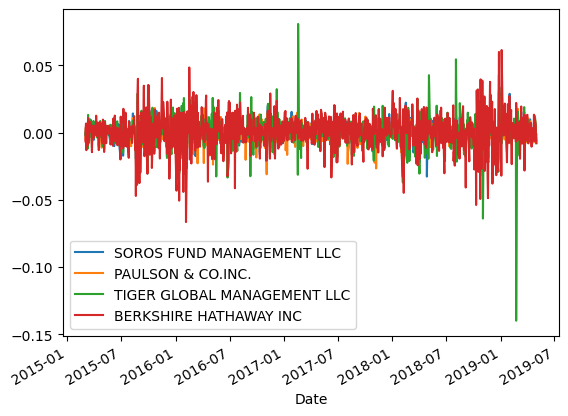

In [19]:
# Plot daily returns of all portfolios
whale_df.plot()

<Axes: xlabel='Date'>

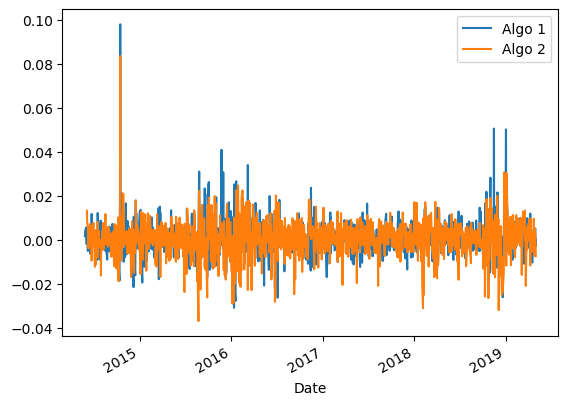

In [20]:
algo_df.plot()

<Axes: xlabel='Date'>

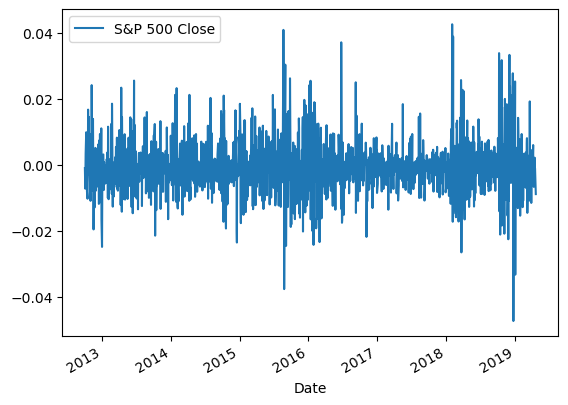

In [21]:
sp500_df.plot()

<Axes: xlabel='Date'>

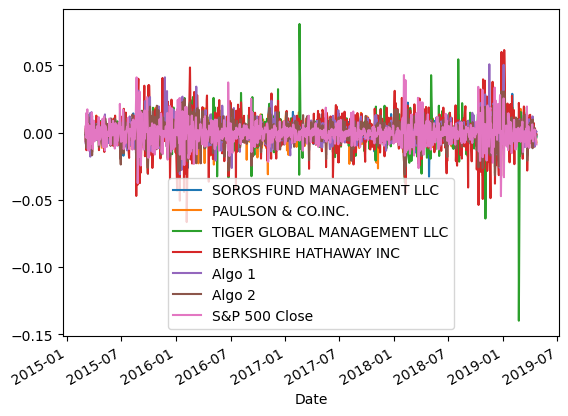

In [22]:
all_df = pd.concat([whale_df , algo_df , sp500_df] , axis=1 , join ='inner')
all_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumualtive Returns'}, xlabel='Date'>

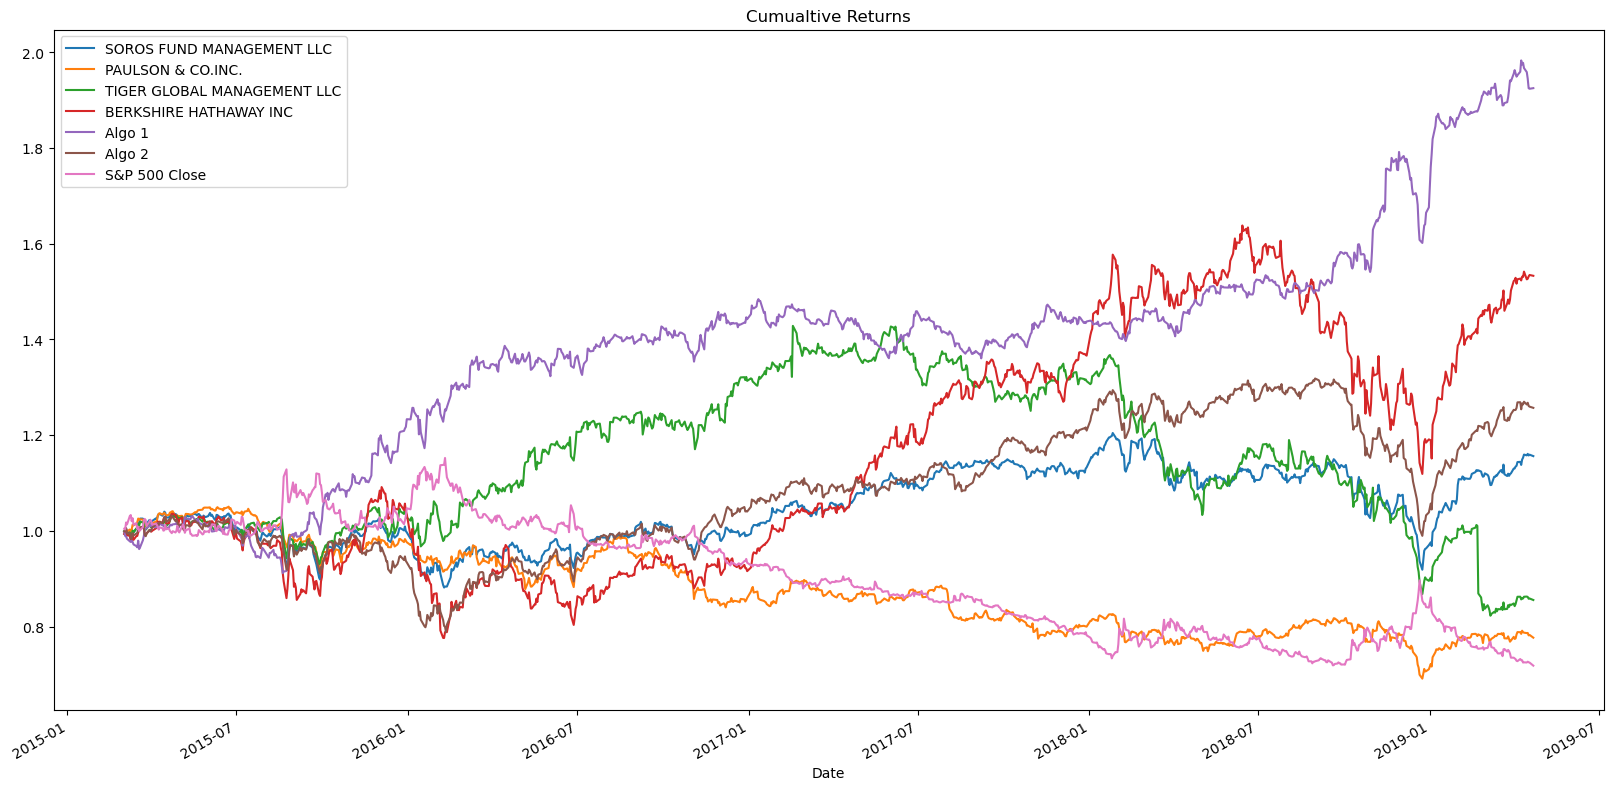

In [24]:
# Calculate cumulative returns of all portfolios
all_returns = (1+all_df).cumprod()
# Plot cumulative returns
all_returns.plot(figsize=(20,10), title = 'Cumualtive Returns')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Box Plot for combined portfolios'}>

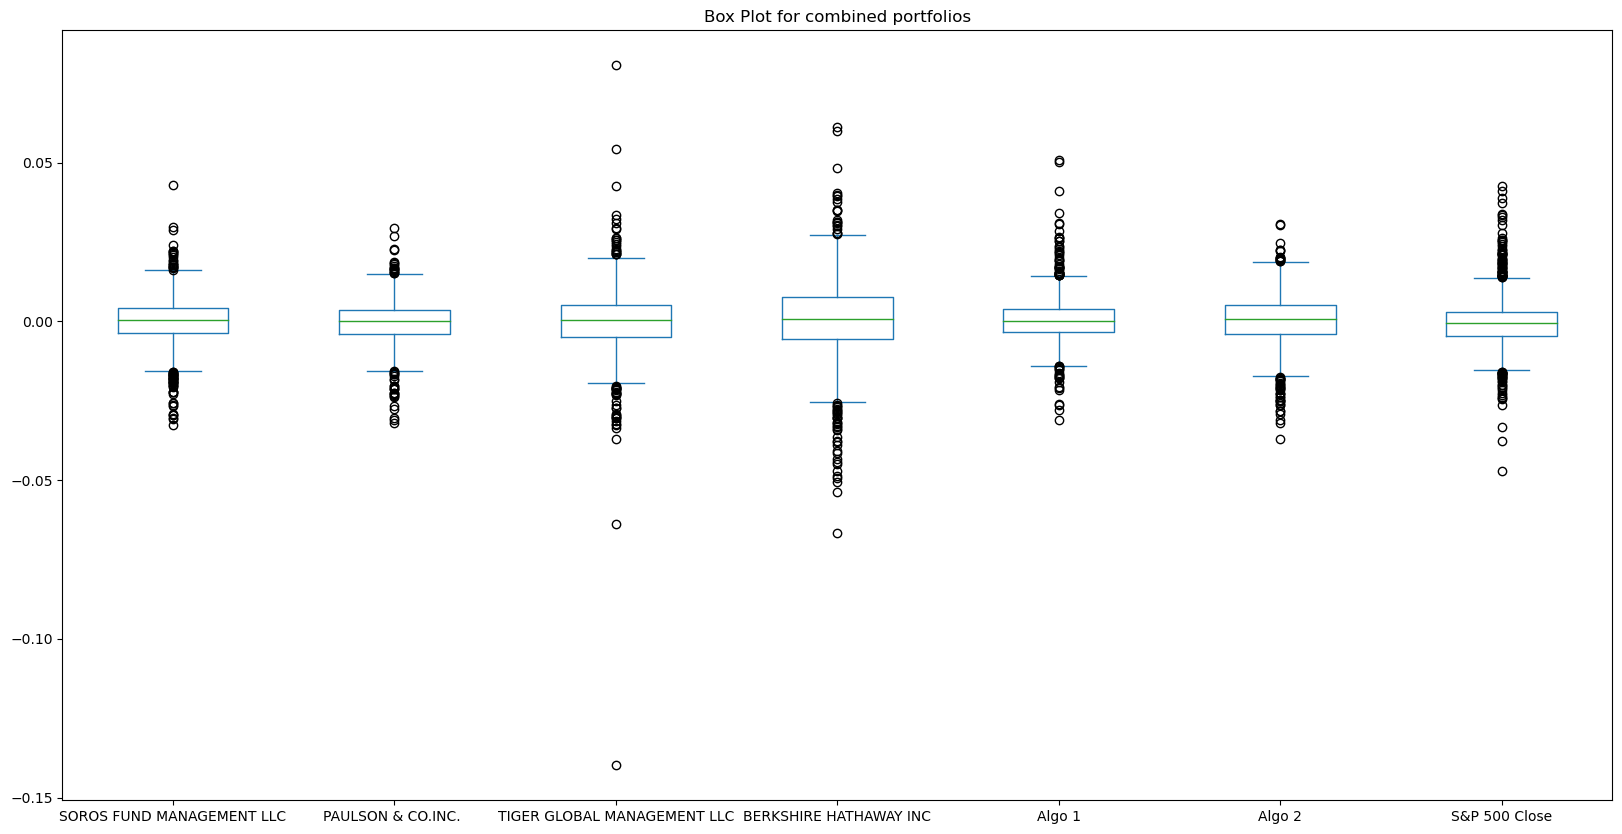

In [25]:
# Box plot to visually show risk
algo_whale_and_sp500.plot.box(figsize = (20,10) , title = "Box Plot for combined portfolios")


### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
algo_whale_and_sp500.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Close                  0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500
standard_deviation_of = algo_whale_and_sp500['S&P 500 Close'].std()

# Determine which portfolios are riskier than the S&P 500
algo_whale_and_sp500.std() > standard_deviation_of

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500 Close                  False
dtype: bool

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation_of = all_df.std() * np.sqrt(252)

# mean_price = np.mean(annualized_standard_deviation_of)
# squared_diffs = (annualized_standard_deviation_of - mean_price) ** 2
# mean_squared_diff = np.mean(squared_diffs)
# annual_deviation = np.sqrt(mean_squared_diff)
# annualized_standard_deviation_of
annualized_standard_deviation_of 

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500 Close                  0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

<Axes: title={'center': 'Rolling Standard deviation for the 21 day window'}, xlabel='Date'>

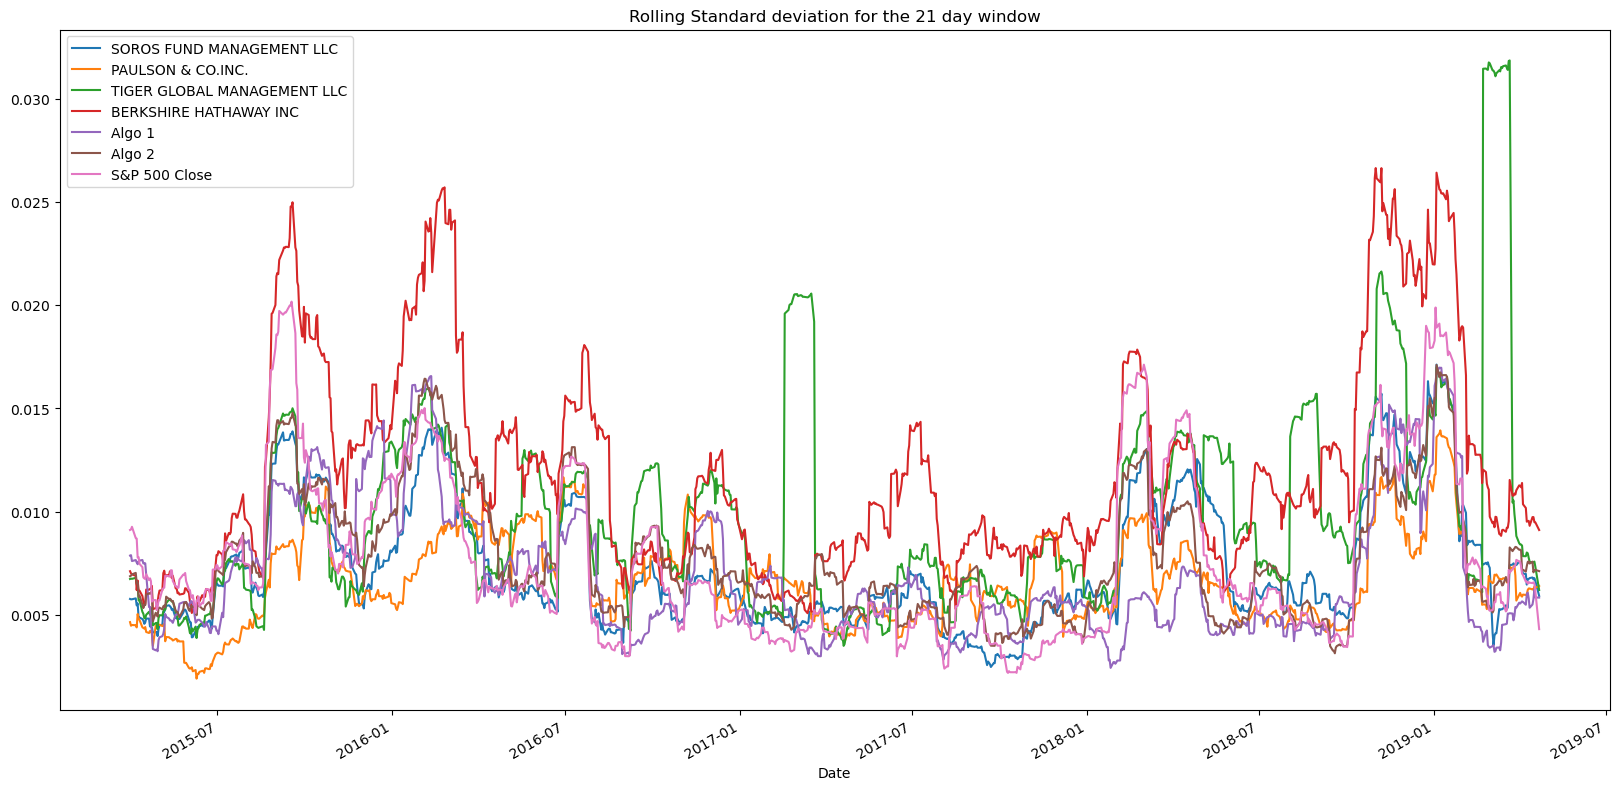

In [32]:
rolling_data = all_df.rolling(window = 21).std()
rolling_data.plot(figsize=(20,10), title = "Rolling Standard deviation for the 21 day window")

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# rolling_std = algo_whale_and_sp500.rolling(window=21).std()
# rolling_std.dropna()
# # Plot the rolling standard deviation
# plt.figure(figsize=(20, 10))
# for rolling_std in rolling_std.columns:
#     plt.plot(rolling_std.index, rolling_std[rolling_std], label=rolling_std)
# plt.xlabel('Date')
# plt.ylabel('Rolling Standard Deviation')
# plt.legend()
# plt.show()

NameError: name 'plt' is not defined

### Calculate and plot the correlation

In [35]:
correlation_df = all_df.corr()
correlation_df.style.background_gradient(cmap = 'summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500 Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [33]:
# Calculate the correlation
# correlation_matrix = np.corrcoef(whale_df , algo_df , sp500_returns, rowvar=False)
# correlation = correlation_matrix[0, 1]

# plt.figure(figsize=(10, 6))
# plt.plot(dates, correlation, label='Correlation')
# plt.xlabel('Date')
# plt.ylabel('Correlation')
# plt.title('Correlation with S&P 500')
# plt.legend()
# plt.show()

# Display de correlation matrix


NameError: name 'sp500_returns' is not defined

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Beta for Algo & S&P 500'}, xlabel='Date'>

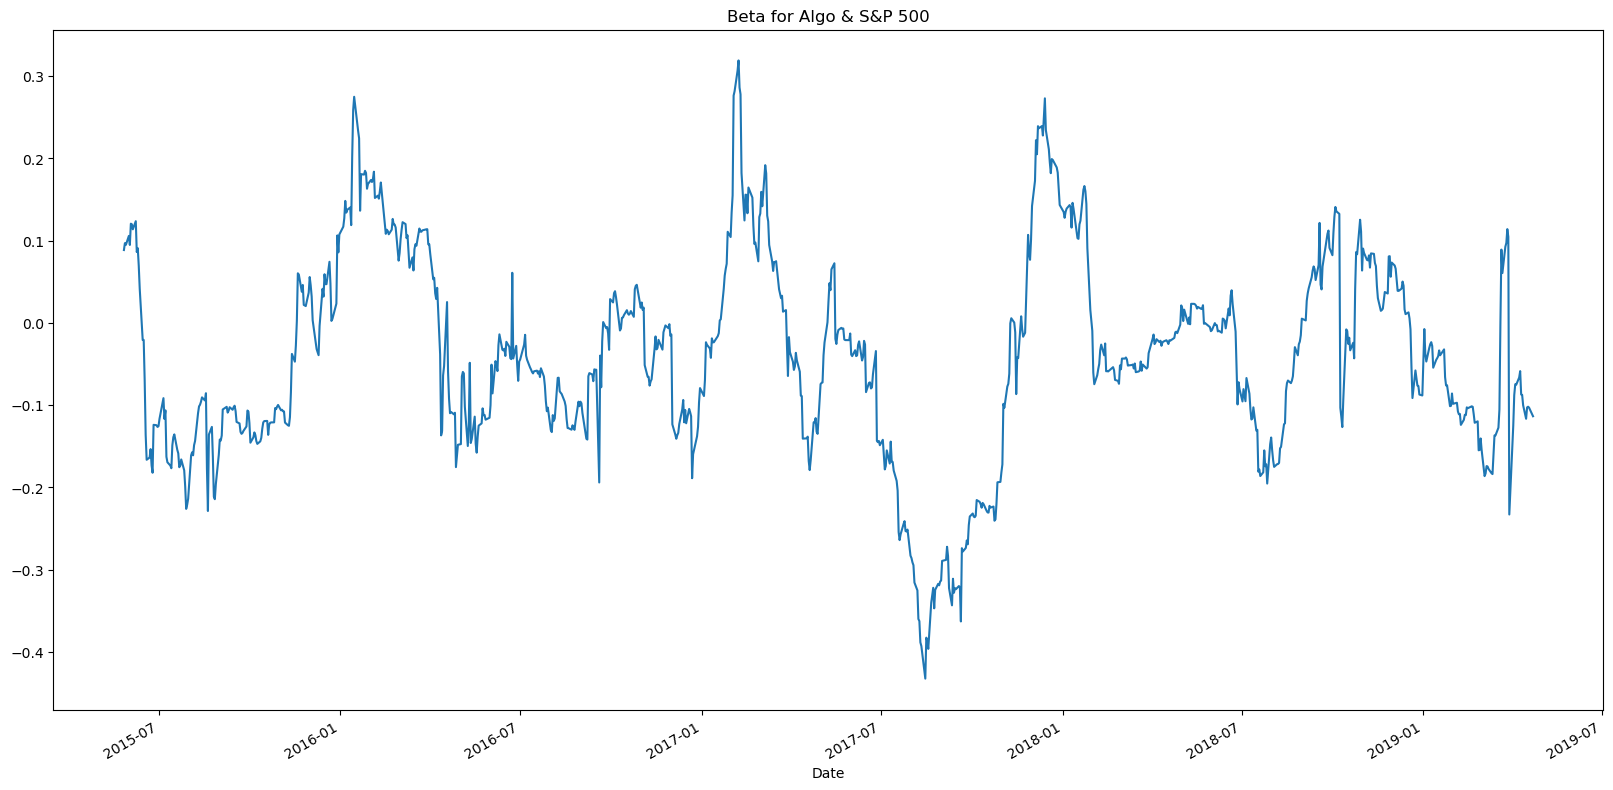

In [40]:
# Calculate covariance of a single portfolio
covariance = all_df["Algo 1"].rolling(window= 60).cov(all_df["S&P 500 Close"])

# Calculate variance of S&P 50
variance = all_df["S&P 500 Close"].rolling(60).var()

# Computing beta
beta = covariance /variance
beta.plot(figsize=(20,10), title = "Beta for Algo & S&P 500") 

# Plot beta trend
# plt.figure(figsize=(15, 8))
# plt.plot(dates, beta, label='Beta')
# plt.xlabel('Date')
# plt.ylabel('Beta')
# plt.title('Beta Trends')
# plt.legend()
# plt.show()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'EWM'}, xlabel='Date'>

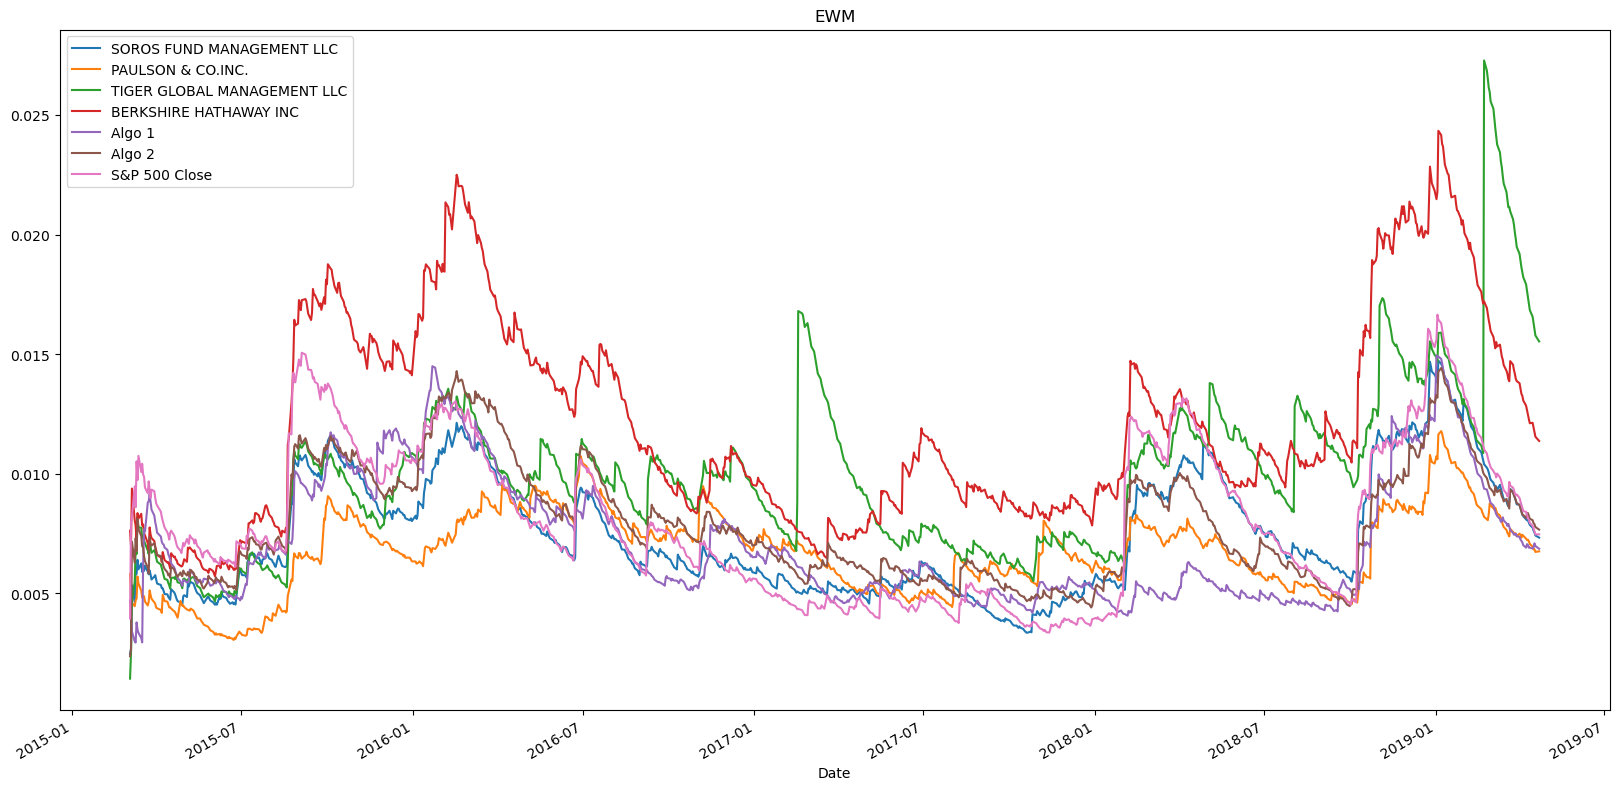

In [41]:
# Use `ewm` to calculate the rolling window
all_df.ewm(halflife=21).std().plot(figsize=(20,10) , title = "EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratio = (all_df.mean()* 252) / (all_df.std()*np.sqrt(252))
sharpe_ratio


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Close                 -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

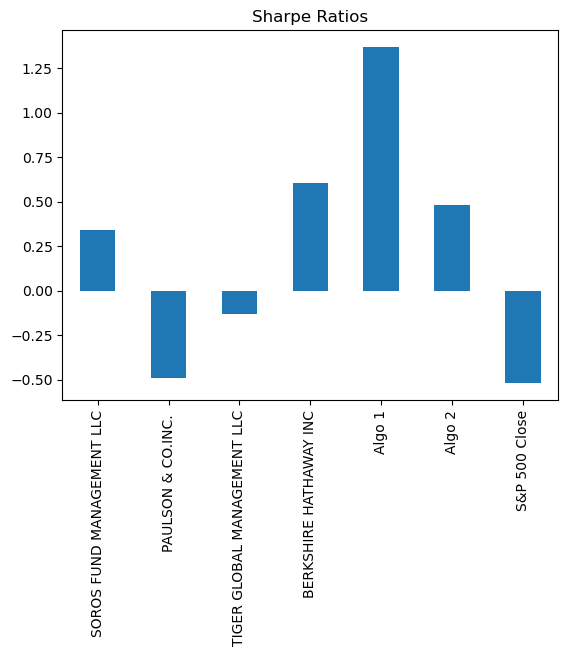

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [118]:
# Reading data from 1st stock
GOOG_returns = Path('Resources/goog_historical.csv')
GOOG_df = pd.read_csv(GOOG_returns, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
COST_df
GOOG_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [119]:
# Reading data from 2nd stock
COST_returns = Path('Resources/cost_historical.csv')
COST_df = pd.read_csv(COST_returns, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
COST_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [114]:
COST_df.index

DatetimeIndex(['2019-05-09', '2019-05-08', '2019-05-07', '2019-05-06',
               '2019-05-03', '2019-05-02', '2019-05-01', '2019-04-30',
               '2019-04-29', '2019-04-26',
               ...
               '2018-05-24', '2018-05-23', '2018-05-22', '2018-05-21',
               '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15',
               '2018-05-14', '2018-05-11'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [120]:
# Reading data from 3rd stock
AAPL_returns = Path('Resources/aapl_historical.csv')
AAPL_df = pd.read_csv(AAPL_returns, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
COST_df
AAPL_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [122]:
# Combine all stocks in a single DataFrame
second_set_of_stocks_df = pd.concat([GOOG_df, COST_df, AAPL_df] , join ='inner')
second_set_of_stocks_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [76]:
# Reset Date index
second_set_of_stocks_df = second_set_of_stocks_df.reset_index()
second_set_of_stocks_df

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40
...,...,...,...
745,2018-05-17,AAPL,186.99
746,2018-05-16,AAPL,188.18
747,2018-05-15,AAPL,186.44
748,2018-05-14,AAPL,188.15


In [124]:
# Reorganize portfolio data by having a column per symbol
reorganized_data = second_set_of_stocks_df.pivot_table(columns='Symbol', values = 'NOCP', index = 'Trade DATE')
reorganized_data

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [141]:
# Calculate daily returns
reorganized_data.pct_change()

# Drop NAs
reorganized_data.dropna()

# Display sample data
reorganized_data

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [144]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_results = reorganized_data / 3.0
# Display sample data
portfolio_returns_results

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,62.863333,65.253333,366.086667
2018-05-14,62.716667,65.293333,366.733333
2018-05-15,62.146667,65.160000,359.743333
2018-05-16,62.726667,66.236667,360.590000
2018-05-17,62.330000,66.533333,359.530000
...,...,...,...
2019-05-03,70.583333,81.540000,395.133333
2019-05-06,69.493333,81.410000,396.463333
2019-05-07,67.620000,80.060000,391.366667


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [160]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([portfolio_returns_results , reorganized_data])

In [161]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,62.863333,65.253333,366.086667
2018-05-14,62.716667,65.293333,366.733333
2018-05-15,62.146667,65.160000,359.743333
2018-05-16,62.726667,66.236667,360.590000
2018-05-17,62.330000,66.533333,359.530000
...,...,...,...
2019-05-03,211.750000,244.620000,1185.400000
2019-05-06,208.480000,244.230000,1189.390000
2019-05-07,202.860000,240.180000,1174.100000


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [162]:
# Calculate the annualized `std`
combined_df.std()

Symbol
AAPL     65.937063
COST     74.885902
GOOG    382.813256
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Standard deviation for the 21 day window of the combined dataframes'}, xlabel='Trade DATE'>

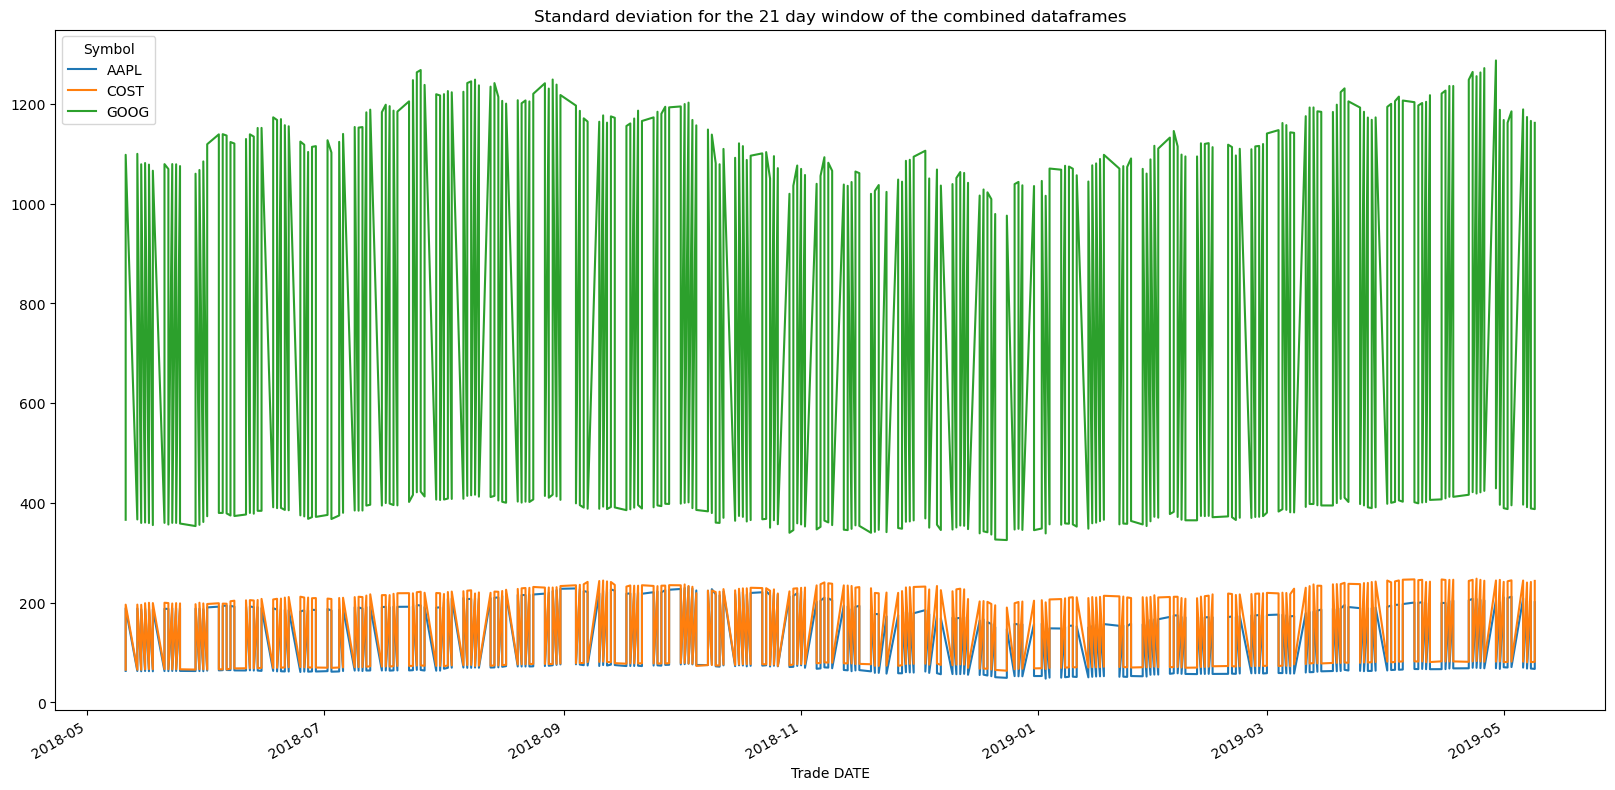

In [163]:
# Calculate rolling standard deviation
combined_df.rolling(window = 21).std
# Plot rolling standard deviation
combined_df.plot(figsize=(20,10), title = "Standard deviation for the 21 day window of the combined dataframes")

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation for Combined Dataframes'}, xlabel='Trade DATE'>

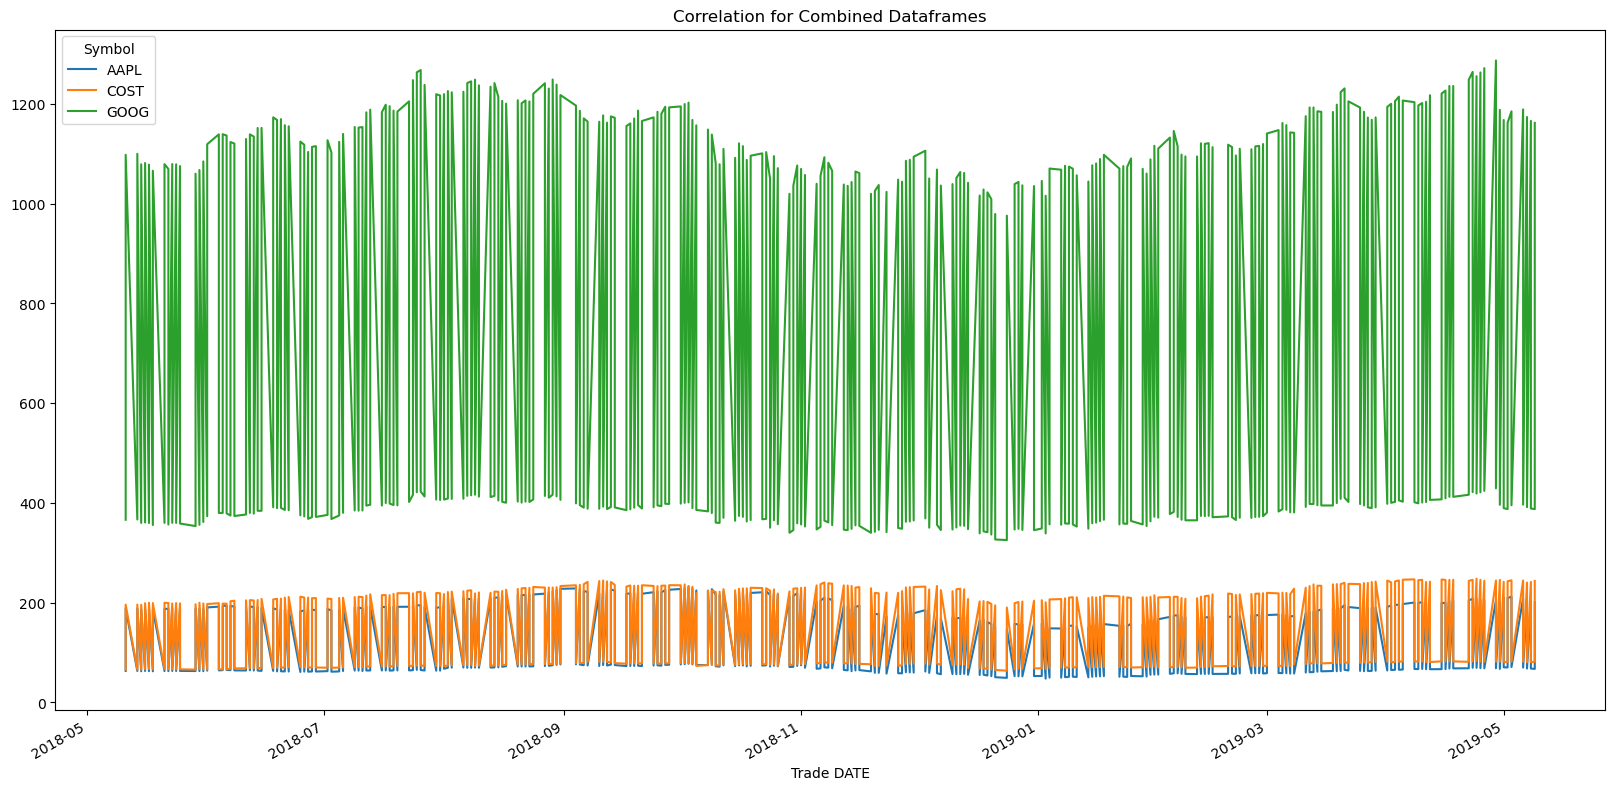

In [164]:
# Calculate and plot the correlation
combined_df.corr()
combined_df.plot(figsize=(20,10), title = "Correlation for Combined Dataframes")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Beta for 60 day window compared to the S&P 500'}, xlabel='Date'>

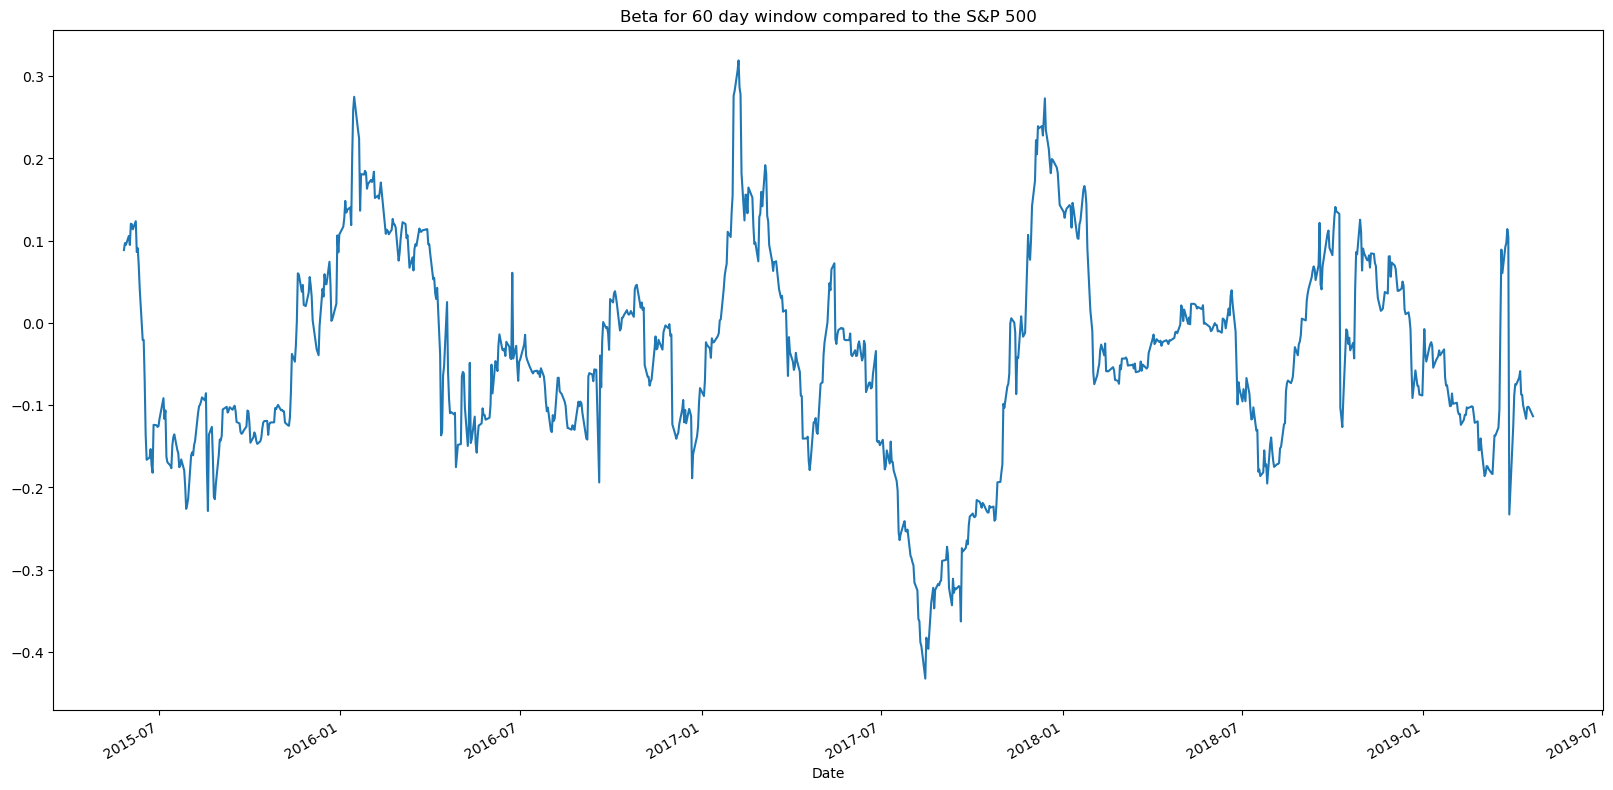

In [165]:
# Calculate and plot Beta
beta = covariance /variance
beta.plot(figsize=(20,10), title = "Beta for 60 day window compared to the S&P 500") 

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [166]:
# Calculate Annualized Sharpe Ratios
combined_sharpe_ratio = (all_df.mean()* 252) / (all_df.std()*np.sqrt(252))
combined_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Close                 -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

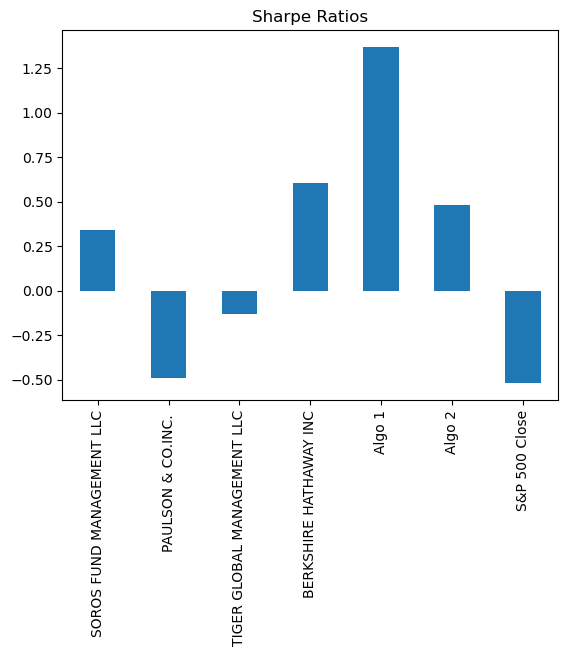

In [167]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot(kind="bar", title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [170]:
print('My portfolio has maintained a fairly consistent value over the past year spanning from 2018-2019.')

My portfolio has maintained a fairly consistent value over the past year spanning from 2018-2019.
